In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
apr = pd.read_csv("/Users/jacopobinati/Desktop/HM2/listings_APR_FINAL2.csv")
oct = pd.read_csv("/Users/jacopobinati/Desktop/HM2/listings_OCT_FINAL2.csv")
apr.head()

/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_18191/1775640561.py:1: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  apr = pd.read_csv("/Users/jacopobinati/Desktop/HM2/listings_APR_FINAL2.csv")
/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_18191/1775640561.py:2: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  oct = pd.read_csv("/Users/jacopobinati/Desktop/HM2/listings_OCT_FINAL2.csv")


,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,...,d_closet,d_EV_charger,d_Fireplace_guards,d_Exercise_equipment_yoga_mat,d_and_closet,d_Sun_loungers,d_dresser,d_Beach_access,d_and_dresser,d_treadmill
0,100%,100%,False,True,True,Canarsie,Private room,1,1 shared bath,1.0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,False,True,True,Civic Center,Private room,1,1 shared bath,5.0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,False,True,True,Greenpoint,Private room,2,2 baths,1.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,False,True,False,Upper West Side,House,3,1 bath,1.0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,False,True,True,Washington Heights,Private room,1,1 bath,1.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
oct.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,beds,...,d_Paid_parking_lot_off_premises,d_Private_hot_tub,d_Fireplace_guards,d_Resort_access,d_EV_charger,d_Changing_table,d_Beach_access,d_stationary_bike,d_Exercise_equipment_yoga_mat,d_Bay_view
0,NaN,NaN,False,True,False,Bushwick,Private room,1,1 shared bath,1.0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,False,True,True,Hell's Kitchen,Private room,2,1 bath,1.0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,False,True,False,Sunnyside,House,1,1 bath,1.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,False,True,True,Bedford-Stuyvesant,House,2,1 bath,1.0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,100%,True,True,True,Bedford-Stuyvesant,House,4,1 bath,2.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
apr_columns = set(apr.columns)
oct_columns = set(oct.columns)

# Columns present in both datasets
common_columns = apr_columns.intersection(oct_columns)
print("Variables present in both datasets:")
print(common_columns)

# Columns unique to each dataset
apr_only_columns = apr_columns.difference(oct_columns)
oct_only_columns = oct_columns.difference(apr_columns)

print("\nVariables unique to April dataset:")
print(apr_only_columns)

print("\nVariables unique to October dataset:")
print(oct_only_columns)

Variables present in both datasets:
{'d_Indoor_fireplace_electric', 'review_scores_location', 'd_Courtyard_view', 'amenities', 'd_Roku', 'd_Ceiling_fan', 'd_Fire_pit', 'property_House', 'd_Hot_water', 'd_Paid_dryer_u2013_In_building', 'd_Dryer', 'd_Safe', 'd_Paid_street_parking_off_premises', 'd_Freezer', 'neighbourhood_cleansed', 'd_Hulu', 'd_Self_check_in', 'n_number_of_reviews_ltm', 'd_ac', 'd_Lockbox', 'n_review_scores_value', 'f_property_type', 'd_Blender', 'f_neighbourhood_cleansed', 'd_clothing_storage', 'd_conditioner', 'n_beds', 'd_Disney_', 'n_reviews_per_month', 'n_review_scores_communication', 'd_body_wash', 'd_Board_games', 'availability_60', 'd_Paid_parking_lot_off_premises', 'reviews_per_month', 'review_scores_value', 'host_acceptance_rate', 'availability_90', 'd_Pool_table', 'd_Laundromat_nearby', 'calculated_host_listings_count_shared_rooms', 'd_kettel', 'd_stationary_bike', 'd_Iron', 'd_backyard', 'd_Cooking_basics', 'd_Ethernet_connection', 'd_breakfast', 'd_Keypad',

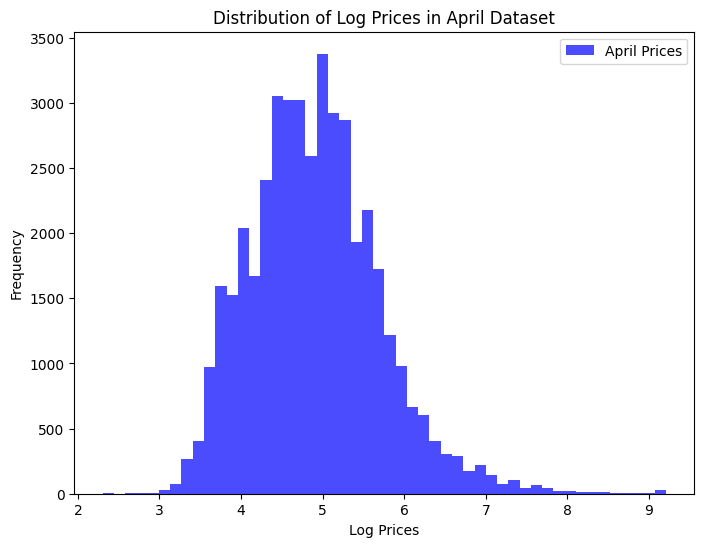

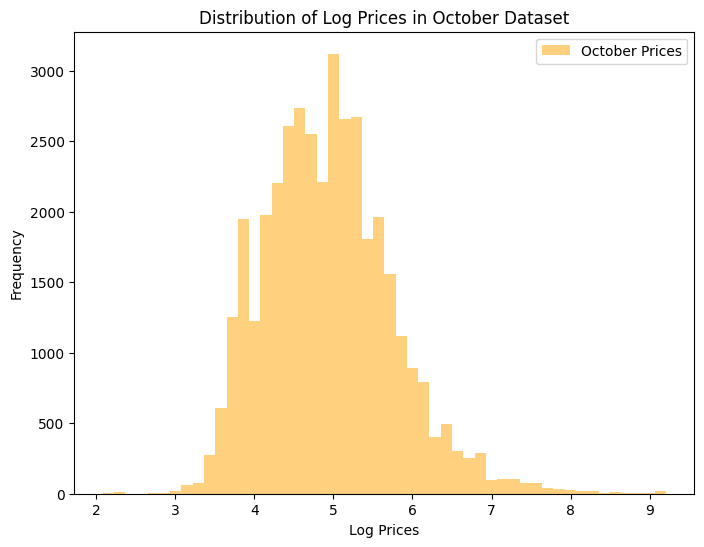

In [22]:
filtered_apr_ln_price = apr[apr['ln_price'] > 0]['ln_price']
filtered_oct_ln_price = oct[oct['ln_price'] > 0]['ln_price']

# Plotting the distribution of 'ln_price' variable for April dataset after filtering
plt.figure(figsize=(8, 6))
plt.hist(filtered_apr_ln_price, bins=50, alpha=0.7, color='blue', label='April Prices')
plt.title('Distribution of Log Prices in April Dataset')
plt.xlabel('Log Prices')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting the distribution of 'ln_price' variable for October dataset after filtering
plt.figure(figsize=(8, 6))
plt.hist(filtered_oct_ln_price, bins=50, alpha=0.5, color='orange', label='October Prices')
plt.title('Distribution of Log Prices in October Dataset')
plt.xlabel('Log Prices')
plt.ylabel('Frequency')
plt.legend()
plt.show()
                                

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


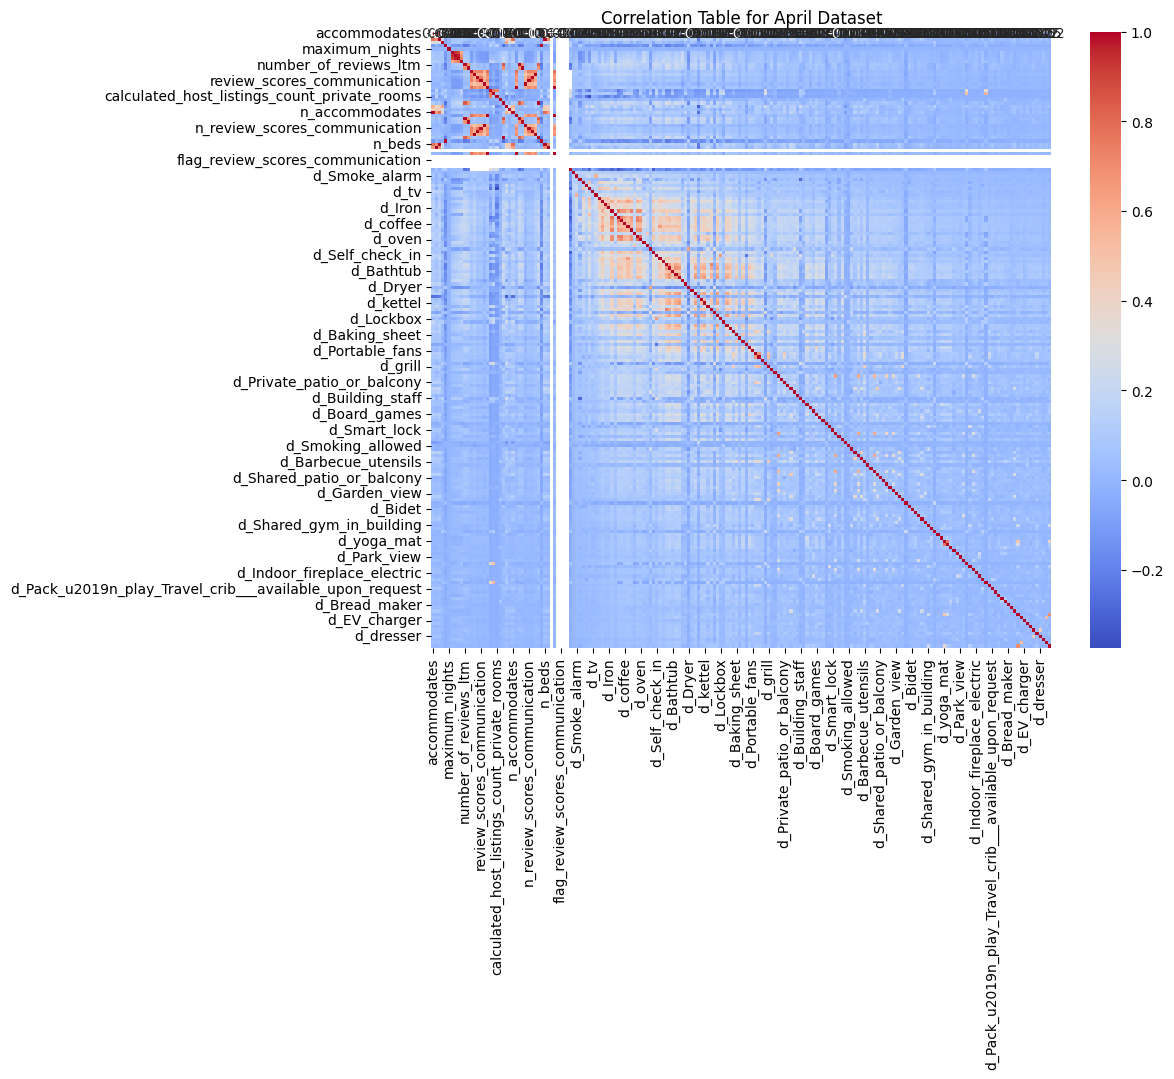

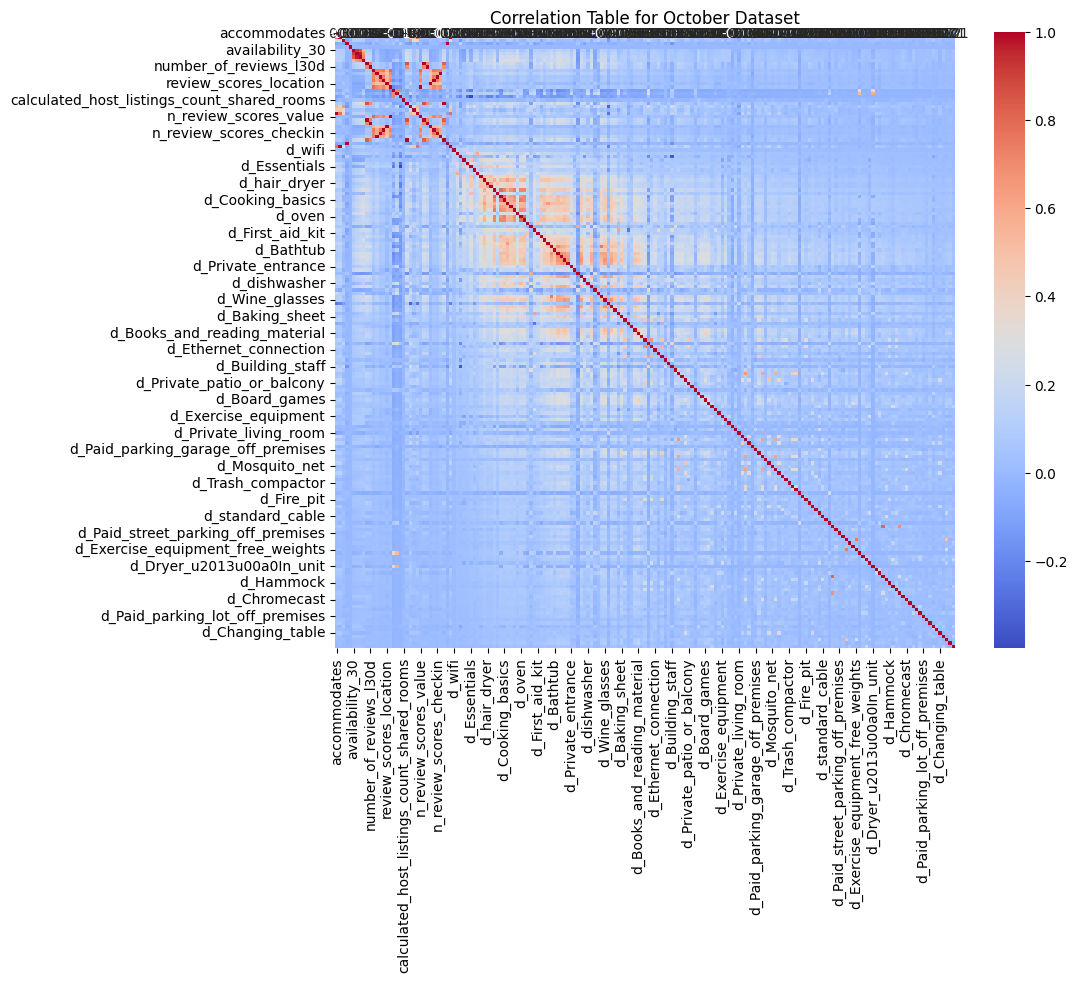

In [24]:
apr_numeric = apr.select_dtypes(include=['float64', 'int64'])
oct_numeric = oct.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrices for April and October datasets
apr_corr = apr_numeric.corr()
oct_corr = oct_numeric.corr()

# Plot correlation matrix for April dataset
plt.figure(figsize=(10, 8))
sns.heatmap(apr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Table for April Dataset')
plt.show()

# Plot correlation matrix for October dataset
plt.figure(figsize=(10, 8))
sns.heatmap(oct_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Table for October Dataset')
plt.show()
